# Preprocessing

In [1]:
import json
import re

# File paths
train_path = "train.json"
valid_path = "valid.json"
test_path = "test.json"

# Load JSON data
def load_json(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

train_data = load_json(train_path)
valid_data = load_json(valid_path)
test_data = load_json(test_path)

# Text Cleaning Function
def clean_text(text):
    """Normalize text by removing special characters, fixing spacing, and correcting typos."""
    text = text.strip()  # Remove leading/trailing spaces
    text = re.sub(r"\s+", " ", text)  # Normalize multiple spaces
    text = re.sub(r"!!+", "!", text)  # Reduce multiple exclamation marks
    text = text.replace("u ", "you ").replace("muh ", "my ")  # Fix informal text
    return text

# Dataset Preprocessing Function
def preprocess_dataset(dataset):
    """Clean and structure the dataset."""
    processed_data = []
    
    for entry in dataset:
        cleaned_entry = {
            "question": clean_text(entry["question"]),
            "answers": [clean_text(ans) for ans in entry["answers"]],
            "labelled_summary": clean_text(entry["labelled_summaries"].get("INFORMATION_SUMMARY", ""))
        }
        processed_data.append(cleaned_entry)
    
    return processed_data

# Apply cleaning
cleaned_train = preprocess_dataset(train_data)
cleaned_valid = preprocess_dataset(valid_data)
cleaned_test = preprocess_dataset(test_data)

# Save cleaned datasets
def save_json(data, filename):
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

save_json(cleaned_train, "cleaned_train.json")
save_json(cleaned_valid, "cleaned_valid.json")
save_json(cleaned_test, "cleaned_test.json")

print("Preprocessing complete! Cleaned datasets saved.")


Preprocessing complete! Cleaned datasets saved.


In [2]:
# File paths
train_path = "train.json"
valid_path = "valid.json"
test_path = "test.json"

# Load JSON data
def load_json(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

train_data = load_json(train_path)
valid_data = load_json(valid_path)
test_data = load_json(test_path)

# Text Cleaning Function
def clean_text(text):
    """Normalize text by removing special characters, fixing spacing, and correcting typos."""
    text = text.strip()  # Remove leading/trailing spaces
    text = re.sub(r"\s+", " ", text)  # Normalize multiple spaces
    text = re.sub(r"!!+", "!", text)  # Reduce multiple exclamation marks
    text = text.replace("u ", "you ").replace("muh ", "my ")  # Fix informal text
    return text

# Dataset Preprocessing Function
def preprocess_dataset(dataset):
    """Clean and structure the dataset."""
    processed_data = []
    
    for entry in dataset:
        cleaned_entry = {
            "question": clean_text(entry["question"]),
            "answers": [clean_text(ans) for ans in entry["answers"]],
            "labelled_summary": clean_text(entry["labelled_summaries"].get("INFORMATION_SUMMARY", ""))
        }
        processed_data.append(cleaned_entry)
    
    return processed_data

# Apply cleaning
cleaned_train = preprocess_dataset(train_data)
cleaned_valid = preprocess_dataset(valid_data)
cleaned_test = preprocess_dataset(test_data)

# Save cleaned datasets
def save_json(data, filename):
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

save_json(cleaned_train, "cleaned_train.json")
save_json(cleaned_valid, "cleaned_valid.json")
save_json(cleaned_test, "cleaned_test.json")

print("Preprocessing complete! Cleaned datasets saved.")


Preprocessing complete! Cleaned datasets saved.


# Tokenization

In [3]:
import numpy as np
from transformers import BertTokenizer, T5Tokenizer

# Load cleaned datasets
def load_json(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

train_data = load_json("cleaned_train.json")
valid_data = load_json("cleaned_valid.json")
test_data = load_json("cleaned_test.json")

# Load Hugging Face Tokenizers
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Function to tokenize dataset
def tokenize_dataset(dataset, tokenizer):
    tokenized_data = []
    question_lengths = []
    answer_lengths = []
    summary_lengths = []

    for entry in dataset:
        # Tokenize question
        question_tokens = tokenizer(entry["question"], truncation=True, padding="longest")
        question_lengths.append(len(question_tokens["input_ids"]))

        # Tokenize each answer
        answer_tokens = [tokenizer(ans, truncation=True, padding="longest") for ans in entry["answers"]]
        answer_lengths.extend([len(ans["input_ids"]) for ans in answer_tokens])

        # Tokenize summary
        summary_tokens = tokenizer(entry["labelled_summary"], truncation=True, padding="longest")
        summary_lengths.append(len(summary_tokens["input_ids"]))

        # Store tokenized results
        tokenized_data.append({
            "question_tokens": question_tokens["input_ids"],
            "answers_tokens": [ans["input_ids"] for ans in answer_tokens],
            "summary_tokens": summary_tokens["input_ids"]
        })

    return tokenized_data, question_lengths, answer_lengths, summary_lengths

# Tokenize datasets
tokenized_train, train_q_lens, train_a_lens, train_s_lens = tokenize_dataset(train_data, bert_tokenizer)
tokenized_valid, valid_q_lens, valid_a_lens, valid_s_lens = tokenize_dataset(valid_data, bert_tokenizer)
tokenized_test, test_q_lens, test_a_lens, test_s_lens = tokenize_dataset(test_data, bert_tokenizer)

# Compute Length Statistics
def compute_statistics(lengths, name):
    print(f"\n {name} Length Analysis:")
    print(f"Max Length: {np.max(lengths)}")
    print(f"95th Percentile: {np.percentile(lengths, 95)}")
    print(f"Mean Length: {np.mean(lengths):.2f}")
    print(f"Median Length: {np.median(lengths)}")

# Analyze Lengths
compute_statistics(train_q_lens, "Questions")
compute_statistics(train_a_lens, "Answers")
compute_statistics(train_s_lens, "Summaries")

# Save Tokenized Data
def save_json(data, filename):
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

save_json(tokenized_train, "tokenized_train.json")
save_json(tokenized_valid, "tokenized_valid.json")
save_json(tokenized_test, "tokenized_test.json")

print("\nTokenization complete! Tokenized datasets saved.")


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



 Questions Length Analysis:
Max Length: 38
95th Percentile: 29.0
Mean Length: 16.15
Median Length: 15.0

 Answers Length Analysis:
Max Length: 512
95th Percentile: 231.0
Mean Length: 70.44
Median Length: 44.0

 Summaries Length Analysis:
Max Length: 398
95th Percentile: 189.25
Mean Length: 71.42
Median Length: 59.0

Tokenization complete! Tokenized datasets saved.


# Token Length Analysis

In [4]:
import numpy as np

# Load tokenized data
def load_json(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

tokenized_train = load_json("tokenized_train.json")
tokenized_valid = load_json("tokenized_valid.json")
tokenized_test = load_json("tokenized_test.json")

# Extract token lengths
train_q_lens = [len(entry["question_tokens"]) for entry in tokenized_train]
train_a_lens = [len(ans) for entry in tokenized_train for ans in entry["answers_tokens"]]
train_s_lens = [len(entry["summary_tokens"]) for entry in tokenized_train]

valid_q_lens = [len(entry["question_tokens"]) for entry in tokenized_valid]
valid_a_lens = [len(ans) for entry in tokenized_valid for ans in entry["answers_tokens"]]
valid_s_lens = [len(entry["summary_tokens"]) for entry in tokenized_valid]

test_q_lens = [len(entry["question_tokens"]) for entry in tokenized_test]
test_a_lens = [len(ans) for entry in tokenized_test for ans in entry["answers_tokens"]]
test_s_lens = [len(entry["summary_tokens"]) for entry in tokenized_test]

# Function to compute statistics
def compute_statistics(lengths, name):
    print(f"\n {name} Token Length Analysis:")
    print(f"Max Length: {np.max(lengths)}")
    print(f"95th Percentile: {np.percentile(lengths, 95)}")
    print(f"Mean Length: {np.mean(lengths):.2f}")
    print(f"Median Length: {np.median(lengths)}")

# Analyze token lengths
compute_statistics(train_q_lens, "Questions")
compute_statistics(train_a_lens, "Answers")
compute_statistics(train_s_lens, "Summaries")



 Questions Token Length Analysis:
Max Length: 38
95th Percentile: 29.0
Mean Length: 16.15
Median Length: 15.0

 Answers Token Length Analysis:
Max Length: 512
95th Percentile: 231.0
Mean Length: 70.44
Median Length: 44.0

 Summaries Token Length Analysis:
Max Length: 398
95th Percentile: 189.25
Mean Length: 71.42
Median Length: 59.0


# Final Tokenization with Truncation & Padding

In [5]:
import torch
from transformers import BertTokenizer, T5Tokenizer

# Load cleaned datasets
def load_json(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

train_data = load_json("cleaned_train.json")
valid_data = load_json("cleaned_valid.json")
test_data = load_json("cleaned_test.json")

# Load Hugging Face Tokenizers
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Truncation limits based on analysis
MAX_LENGTH_QUESTION = 40
MAX_LENGTH_ANSWER = 250
MAX_LENGTH_SUMMARY = 190

# Function to tokenize dataset with truncation & padding
def tokenize_for_training(dataset, tokenizer):
    tokenized_data = []

    for entry in dataset:
        # Tokenize question
        question_tokens = tokenizer(
            entry["question"], 
            truncation=True, 
            padding="max_length", 
            max_length=MAX_LENGTH_QUESTION, 
            return_tensors="pt"
        )

        # Tokenize answers
        answer_tokens = [tokenizer(
            ans, truncation=True, padding="max_length", 
            max_length=MAX_LENGTH_ANSWER, return_tensors="pt"
        ) for ans in entry["answers"]]

        # Tokenize summary
        summary_tokens = tokenizer(
            entry["labelled_summary"], 
            truncation=True, 
            padding="max_length", 
            max_length=MAX_LENGTH_SUMMARY, 
            return_tensors="pt"
        )

        # Store tokenized tensors
        tokenized_data.append({
            "question_input_ids": question_tokens["input_ids"].squeeze(0),
            "question_attention_mask": question_tokens["attention_mask"].squeeze(0),
            "answers_input_ids": [ans["input_ids"].squeeze(0) for ans in answer_tokens],
            "answers_attention_mask": [ans["attention_mask"].squeeze(0) for ans in answer_tokens],
            "summary_input_ids": summary_tokens["input_ids"].squeeze(0),
            "summary_attention_mask": summary_tokens["attention_mask"].squeeze(0),
        })

    return tokenized_data

# Apply final tokenization
final_train = tokenize_for_training(train_data, bert_tokenizer)
final_valid = tokenize_for_training(valid_data, bert_tokenizer)
final_test = tokenize_for_training(test_data, bert_tokenizer)

# Save as PyTorch tensors
torch.save(final_train, "final_train.pt")
torch.save(final_valid, "final_valid.pt")
torch.save(final_test, "final_test.pt")

print("Final tokenization complete! Processed datasets saved as PyTorch tensors.")


Final tokenization complete! Processed datasets saved as PyTorch tensors.


# Fine Tuning BERT

In [6]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW

# Load tokenized dataset
train_data = torch.load("final_train.pt")
valid_data = torch.load("final_valid.pt")

# Define a Custom Dataset Class
class ExtractiveDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        return {
            "input_ids": item["question_input_ids"],
            "attention_mask": item["question_attention_mask"],
            "answer_ids": item["answers_input_ids"][0],  # Use first answer
            "answer_mask": item["answers_attention_mask"][0],
            "labels": torch.ones_like(item["answers_input_ids"][0])  # Assume all tokens are important for now
        }

# Create DataLoaders
batch_size = 8
train_dataset = ExtractiveDataset(train_data)
valid_dataset = ExtractiveDataset(valid_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Define Extractive Summarization Model
class ExtractiveBERT(nn.Module):
    def __init__(self):
        super(ExtractiveBERT, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = nn.Linear(self.bert.config.hidden_size, 1)  # Binary Classification (Important/Not Important)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state).squeeze(-1)  # Shape: (batch_size, seq_len)
        return logits

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ExtractiveBERT().to(device)

# Loss & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training Function
def train_model(model, train_loader, valid_loader, epochs=3):
    model.train()
    
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["answer_ids"].to(device)
            attention_mask = batch["answer_mask"].to(device)
            labels = batch["labels"].float().to(device)

            optimizer.zero_grad()
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}: Loss = {total_loss / len(train_loader):.4f}")

# Start Training
train_model(model, train_loader, valid_loader, epochs=3)

# Save Model
torch.save(model.state_dict(), "extractive_bert.pth")
print("✅ Model training complete! Model saved as extractive_bert.pth")


C:\Users\USER\AppData\Local\Temp\ipykernel_4620\208085258.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("final_train.pt")
C:\Users\USER\AppData

Epoch 1: Loss = 0.0132
Epoch 2: Loss = 0.0002
Epoch 3: Loss = 0.0001
✅ Model training complete! Model saved as extractive_bert.pth


# Code for Extractive Summarization

In [1]:
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from rouge_score import rouge_scorer
import nltk
from nltk.tokenize import sent_tokenize
import numpy as np

nltk.download("punkt")  # Ensure sentence tokenizer is available

# Load trained model
class ExtractiveBERT(torch.nn.Module):
    def __init__(self):
        super(ExtractiveBERT, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state).squeeze(-1)
        return logits

# Define ExtractiveDataset class
class ExtractiveDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        return {
            "answer_ids": torch.tensor(item["answers_input_ids"][0]),
            "answer_mask": torch.tensor(item["answers_attention_mask"][0])
        }

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ExtractiveBERT().to(device)
model.load_state_dict(torch.load("extractive_bert.pth", map_location=device))
model.eval()

# Load test dataset
test_data = torch.load("final_test.pt")

# Check available keys in test data
print("\n✅ Available keys in test_data:", test_data[0].keys())

# Identify the correct key for human-written summaries
summary_key = None
for key in ["summary_input_ids", "labelled_summaries", "summary"]:
    if key in test_data[0]:
        summary_key = key
        break

if not summary_key:
    raise KeyError("❌ No valid summary key found in test dataset!")

print(f"\n✅ Using `{summary_key}` as the reference summary key.")

# Define DataLoader
batch_size = 4
test_dataset = ExtractiveDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Sentence-Level Extraction Function
def extract_sentences(model, test_loader, threshold=0.7):
    model.eval()
    extracted_summaries = []

    for batch in test_loader:
        input_ids = batch["answer_ids"].to(device)
        attention_mask = batch["answer_mask"].to(device)

        with torch.no_grad():
            logits = model(input_ids, attention_mask)

        # Convert logits to probabilities
        probs = torch.sigmoid(logits)

        for i in range(len(input_ids)):
            full_text = bert_tokenizer.decode(input_ids[i], skip_special_tokens=True)

            # Token Importance Scores
            token_importance = probs[i].cpu().numpy()

            # Convert text to sentences
            sentences = sent_tokenize(full_text)

            # Compute average importance score per sentence
            sentence_scores = []
            start = 0
            for sent in sentences:
                token_count = len(bert_tokenizer.encode(sent, add_special_tokens=False))
                avg_score = np.mean(token_importance[start : start + token_count])  # Avg importance
                sentence_scores.append((sent, avg_score))
                start += token_count

            # Sort sentences by importance & select top N%
            sentence_scores.sort(key=lambda x: x[1], reverse=True)
            top_sentences = [sent for sent, score in sentence_scores[: max(1, len(sentences) // 2)]]

            extracted_summaries.append(" ".join(top_sentences))

    return extracted_summaries

# Extract Key Sentences
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
extracted_sentences = extract_sentences(model, test_loader, threshold=0.7)

# Compute ROUGE Scores
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

rouge_scores = []
for i in range(len(test_data)):
    reference_summary = (
        bert_tokenizer.decode(test_data[i][summary_key], skip_special_tokens=True)
        if "input_ids" in summary_key else test_data[i][summary_key]
    )
    predicted_summary = extracted_sentences[i]  # Model output
    scores = scorer.score(reference_summary, predicted_summary)
    rouge_scores.append(scores)

# Compute Average ROUGE Scores
avg_rouge_1 = np.mean([score["rouge1"].fmeasure for score in rouge_scores])
avg_rouge_2 = np.mean([score["rouge2"].fmeasure for score in rouge_scores])
avg_rouge_l = np.mean([score["rougeL"].fmeasure for score in rouge_scores])

print(f"\n📌 **ROUGE Evaluation Results:**")
print(f"✅ ROUGE-1: {avg_rouge_1:.4f}")
print(f"✅ ROUGE-2: {avg_rouge_2:.4f}")
print(f"✅ ROUGE-L: {avg_rouge_l:.4f}")

# Compute Precision, Recall, F1-Score
def compute_precision_recall(true_labels, predicted_labels):
    precisions, recalls, f1s = [], [], []

    for true, pred in zip(true_labels, predicted_labels):
        true_tokens = set(true.split())
        pred_tokens = set(pred.split())

        precision = len(true_tokens & pred_tokens) / len(pred_tokens) if len(pred_tokens) > 0 else 0
        recall = len(true_tokens & pred_tokens) / len(true_tokens) if len(true_tokens) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Compute Precision, Recall, and F1-Score
precision, recall, f1_score = compute_precision_recall(
    [
        bert_tokenizer.decode(test_data[i][summary_key], skip_special_tokens=True)
        if "input_ids" in summary_key else test_data[i][summary_key]
        for i in range(len(test_data))
    ], 
    extracted_sentences
)

print(f"\n📌 **Precision-Recall Evaluation:**")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1_score:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



✅ Available keys in test_data: dict_keys(['question_input_ids', 'question_attention_mask', 'answers_input_ids', 'answers_attention_mask', 'summary_input_ids', 'summary_attention_mask'])

✅ Using `summary_input_ids` as the reference summary key.


C:\Users\USER\AppData\Local\Temp\ipykernel_17352\3397230030.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "answer_ids": torch.tensor(item["answers_input_ids"][0]),
C:\Users\USER\AppData\Local\Temp\ipykernel_17352\3397230030.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "answer_mask": torch.tensor(item["answers_attention_mask"][0])



📌 **ROUGE Evaluation Results:**
✅ ROUGE-1: 0.2006
✅ ROUGE-2: 0.0847
✅ ROUGE-L: 0.1479

📌 **Precision-Recall Evaluation:**
✅ Precision: 0.2746
✅ Recall: 0.1517
✅ F1-Score: 0.1735


# Extractive Summary Evaluation

In [2]:
from transformers import BertTokenizer, BertModel
from nltk.tokenize import sent_tokenize
import nltk
nltk.download("punkt")

# Load tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load trained BERT extractor
class ExtractiveBERT(torch.nn.Module):
    def __init__(self):
        super(ExtractiveBERT, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state).squeeze(-1)
        return logits

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ExtractiveBERT().to(device)
model.load_state_dict(torch.load("extractive_bert.pth", map_location=device))
model.eval()

# Sentence-level extraction function (used for T5 input)
def extract_sentences_for_t5(data):
    extracted_pairs = []

    for item in data:
        input_ids = torch.tensor(item["answers_input_ids"][0]).unsqueeze(0).to(device)
        attention_mask = torch.tensor(item["answers_attention_mask"][0]).unsqueeze(0).to(device)

        with torch.no_grad():
            logits = model(input_ids, attention_mask)
            probs = torch.sigmoid(logits).squeeze(0).cpu().numpy()

        full_text = bert_tokenizer.decode(input_ids.squeeze(0), skip_special_tokens=True)
        sentences = sent_tokenize(full_text)

        sentence_scores = []
        start = 0
        for sent in sentences:
            token_count = len(bert_tokenizer.encode(sent, add_special_tokens=False))
            avg_score = probs[start:start + token_count].mean() if token_count > 0 else 0
            sentence_scores.append((sent, avg_score))
            start += token_count

        # Select top 50% most relevant sentences
        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        top_sentences = [sent for sent, _ in sentence_scores[: max(1, len(sentences) // 2)]]
        extracted_text = " ".join(top_sentences)

        # Reference summary
        if "summary_input_ids" in item:
            reference = bert_tokenizer.decode(item["summary_input_ids"], skip_special_tokens=True)
        else:
            continue  # skip if summary is missing

        extracted_pairs.append({"input": extracted_text, "target": reference})

    return extracted_pairs

# Load and process train and valid sets
train_data = torch.load("final_train.pt")
valid_data = torch.load("final_valid.pt")

train_pairs = extract_sentences_for_t5(train_data)
valid_pairs = extract_sentences_for_t5(valid_data)

# Save for T5 fine-tuning
with open("train_t5.json", "w", encoding="utf-8") as f:
    json.dump(train_pairs, f, indent=2)

with open("valid_t5.json", "w", encoding="utf-8") as f:
    json.dump(valid_pairs, f, indent=2)

print("✅ T5 input-output pairs saved as train_t5.json and valid_t5.json")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\USER\AppData\Local\Temp\ipykernel_8396\21076055.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(item["answers_input_ids"][0]).unsqueeze(0).to(device)
C:\Users\USER\AppData\Local\Temp\ipykernel_8396\21076055.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(item["answers_attention_mask"][0]).unsqueeze(0).to(device)


✅ T5 input-output pairs saved as train_t5.json and valid_t5.json


# Fine-Tune T5-small for Abstractive Summarization

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/2236 [00:00<?, ? examples/s]

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:3970: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/959 [00:00<?, ? examples/s]

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_4992\581530843.py:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,1.553800,1.485477
2,1.633600,1.457912
3,1.299300,1.445072
4,1.377800,1.447244
5,1.455300,1.443088



✅ T5 fine-tuning complete. Model saved to 't5_summarizer/'


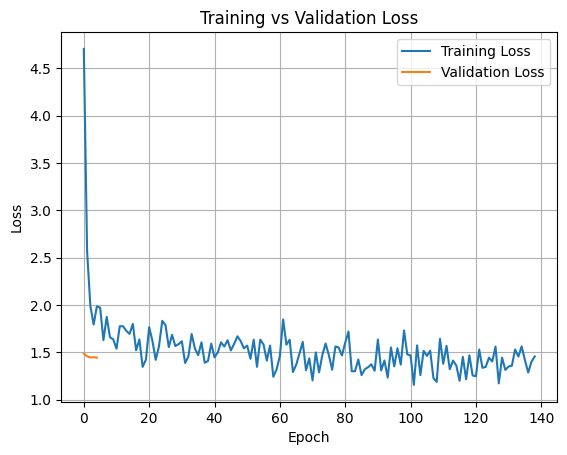

In [1]:
from datasets import load_dataset, Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer
import matplotlib.pyplot as plt

# Load and prepare data
with open("train_t5.json", "r") as f:
    train_data = json.load(f)

with open("valid_t5.json", "r") as f:
    valid_data = json.load(f)

dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(valid_data)

# Load tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Preprocessing function
def preprocess(example):
    model_input = tokenizer(example["input"], max_length=256, truncation=True, padding="max_length")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example["target"], max_length=128, truncation=True, padding="max_length")
    model_input["labels"] = labels["input_ids"]
    return model_input

# Tokenize datasets
train_dataset = dataset.map(preprocess)
valid_dataset = val_dataset.map(preprocess)

# Training arguments
training_args = TrainingArguments(
    output_dir="t5_summarizer",
    evaluation_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=10,
    logging_dir="logs",
    logging_steps=20,
    save_strategy="epoch",
    report_to="none"
)

# Store training loss manually
class LossRecorder:
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []

    def callback(self, logs):
        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])

loss_recorder = LossRecorder()

# Custom Trainer class to hook into log history
class CustomTrainer(Trainer):
    def log(self, logs, *args, **kwargs):
        super().log(logs, *args, **kwargs)
        loss_recorder.callback(logs)


# Trainer setup
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=tokenizer
)

# Start training
trainer.train()

# Save the final model
model.save_pretrained("t5_summarizer")
tokenizer.save_pretrained("t5_summarizer")
print("\n✅ T5 fine-tuning complete. Model saved to 't5_summarizer/'")

# Plot training vs validation loss
plt.plot(loss_recorder.train_losses, label="Training Loss")
plt.plot(loss_recorder.eval_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


# Final Scores

In [1]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset, Dataset
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import bert_score
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")

# Load fine-tuned T5 model and tokenizer
model_path = "t5_summarizer"
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path).to("cpu")
model.eval()

# Load test data
from torch.utils.data import DataLoader, Dataset as TorchDataset
from transformers import BertTokenizer, BertModel

class ExtractiveBERT(torch.nn.Module):
    def __init__(self):
        super(ExtractiveBERT, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state).squeeze(-1)
        return logits

# Load trained extractor
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
extractor = ExtractiveBERT().to("cpu")
extractor.load_state_dict(torch.load("extractive_bert.pth", map_location="cpu"))
extractor.eval()

# Load test set
test_data = torch.load("final_test.pt")

# Extractive to Abstractive pipeline
def extract_inputs_for_t5(data):
    inputs, targets = [], []

    for item in data:
        input_ids = torch.tensor(item["answers_input_ids"][0]).unsqueeze(0)
        attention_mask = torch.tensor(item["answers_attention_mask"][0]).unsqueeze(0)

        with torch.no_grad():
            logits = extractor(input_ids, attention_mask)
            probs = torch.sigmoid(logits).squeeze(0).numpy()

        full_text = bert_tokenizer.decode(input_ids.squeeze(0), skip_special_tokens=True)
        sentences = sent_tokenize(full_text)

        sentence_scores = []
        start = 0
        for sent in sentences:
            token_count = len(bert_tokenizer.encode(sent, add_special_tokens=False))
            avg_score = probs[start:start + token_count].mean() if token_count > 0 else 0
            sentence_scores.append((sent, avg_score))
            start += token_count

        sentence_scores.sort(key=lambda x: x[1], reverse=True)
        top_sentences = [sent for sent, _ in sentence_scores[: max(1, len(sentences) // 2)]]
        extracted = " ".join(top_sentences)

        if "summary_input_ids" in item:
            ref_summary = bert_tokenizer.decode(item["summary_input_ids"], skip_special_tokens=True)
        else:
            continue

        inputs.append(extracted)
        targets.append(ref_summary)

    return inputs, targets

# Run extractor to get T5 inputs
test_inputs, reference_summaries = extract_inputs_for_t5(test_data)

# Generate predictions using T5
predictions = []
for input_text in test_inputs:
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=256, truncation=True)
    summary_ids = model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    pred = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    predictions.append(pred)

# Save predictions
with open("t5_test_predictions.json", "w") as f:
    json.dump([{"input": i, "prediction": p, "reference": r} for i, p, r in zip(test_inputs, predictions, reference_summaries)], f, indent=2)

# --- Evaluation: ROUGE ---
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
rouge_scores = [scorer.score(ref, pred) for ref, pred in zip(reference_summaries, predictions)]

avg_rouge_1 = np.mean([s["rouge1"].fmeasure for s in rouge_scores])
avg_rouge_2 = np.mean([s["rouge2"].fmeasure for s in rouge_scores])
avg_rouge_l = np.mean([s["rougeL"].fmeasure for s in rouge_scores])

print("\n📌 ROUGE Scores")
print(f"✅ ROUGE-1: {avg_rouge_1:.4f}")
print(f"✅ ROUGE-2: {avg_rouge_2:.4f}")
print(f"✅ ROUGE-L: {avg_rouge_l:.4f}")

# --- Evaluation: BLEU ---
bleu_scores = []
smoother = SmoothingFunction().method4
for ref, pred in zip(reference_summaries, predictions):
    ref_tokens = ref.split()
    pred_tokens = pred.split()
    score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoother)
    bleu_scores.append(score)

avg_bleu = np.mean(bleu_scores)
print(f"\n📌 BLEU Score: {avg_bleu:.4f}")

# --- Evaluation: BERTScore ---
P, R, F1 = bert_score.score(predictions, reference_summaries, lang="en", verbose=True)
print("\n📌 BERTScore:")
print(f"✅ Precision: {P.mean():.4f}")
print(f"✅ Recall:    {R.mean():.4f}")
print(f"✅ F1 Score:  {F1.mean():.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\USER\AppData\Local\Temp\ipykernel_17636\3443162528.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(item["answers_input_ids"][0]).unsqueeze(0)
C:\Users\USER\AppData\Local\Temp\ipykernel_17636\3443162528.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(item["answers_attention_mask"][0]).unsqueeze(0)



📌 ROUGE Scores
✅ ROUGE-1: 0.2066
✅ ROUGE-2: 0.0928
✅ ROUGE-L: 0.1647

📌 BLEU Score: 0.0365


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/17 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/10 [00:00<?, ?it/s]

done in 366.66 seconds, 1.75 sentences/sec

📌 BERTScore:
✅ Precision: 0.6365
✅ Recall:    0.6175
✅ F1 Score:  0.6266


# Testing from user input

In [10]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset, Dataset
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import bert_score
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")

from torch.utils.data import DataLoader, Dataset as TorchDataset
from transformers import BertTokenizer, BertModel

class ExtractiveBERT(torch.nn.Module):
    def __init__(self):
        super(ExtractiveBERT, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state).squeeze(-1)
        return logits

# Load fine-tuned T5 model and tokenizer
model_path = "t5_summarizer"
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path).to("cpu")
model.eval()

# Load trained extractor
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
extractor = ExtractiveBERT().to("cpu")
extractor.load_state_dict(torch.load("extractive_bert.pth", map_location="cpu"))
extractor.eval()

# Load test set
test_data = torch.load("final_test.pt")

# Function for single prediction using hybrid model
def summarize_user_input(text):
    model.eval()
    extractor.eval()

    # Tokenize input using BERT tokenizer for extractor
    input_ids = torch.tensor(bert_tokenizer.encode(text, max_length=512, truncation=True)).unsqueeze(0)
    attention_mask = torch.ones_like(input_ids)

    # Run BERT extractor
    with torch.no_grad():
        logits = extractor(input_ids, attention_mask)
        probs = torch.sigmoid(logits).squeeze(0).numpy()

    # Sentence-level extraction
    sentences = sent_tokenize(text)
    sentence_scores = []
    start = 0
    for sent in sentences:
        token_count = len(bert_tokenizer.encode(sent, add_special_tokens=False))
        avg_score = probs[start:start + token_count].mean() if token_count > 0 else 0
        sentence_scores.append((sent, avg_score))
        start += token_count

    # Select top 80% sentences by score
    sentence_scores.sort(key=lambda x: x[1], reverse=True)
    top_sentences = [sent for sent, _ in sentence_scores[: max(1, int(0.8 * len(sentences)))]]
    extracted_text = " ".join(top_sentences)

    if not extracted_text.strip():
        print("⚠️ No high-confidence sentences found. Using full input as fallback.")
        extracted_text = text

    print("Extracted Text:")
    print(extracted_text if extracted_text.strip() else "[Fallback: Full input used]")

    # Generate summary using T5
    extracted_text = "summarize: " + extracted_text
    t5_input = tokenizer.encode(extracted_text, return_tensors="pt", max_length=384, truncation=True).to("cpu")
    with torch.no_grad():
        summary_ids = model.generate(t5_input, max_length=150, num_beams=4, early_stopping=True)

    print("Generated Token IDs:", summary_ids)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print("Raw T5 Output (Decoded):")
    print(summary if summary.strip() else "[Empty Output]")

    return summary

# Example usage
user_input = input("\n📝 Enter a healthcare-related answer text:If you're experiencing frequent headaches along with nausea and sensitivity to light, it's possible you're suffering from migraines. These symptoms can often be triggered by stress, hormonal changes, lack of sleep, or certain foods like chocolate or aged cheese. It's important to keep a headache diary to track patterns and triggers. Over-the-counter medications like ibuprofen or acetaminophen may help, but if the headaches are severe or interfere with your daily life, you should consult a neurologist. Preventive medications and lifestyle modifications like regular exercise, hydration, and consistent sleep schedules can also make a significant difference.  ")
summary = summarize_user_input(user_input)
print("\n✨ Generated Summary:")
print(summary)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



📝 Enter a healthcare-related answer text:If you're experiencing frequent headaches along with nausea and sensitivity to light, it's possible you're suffering from migraines. These symptoms can often be triggered by stress, hormonal changes, lack of sleep, or certain foods like chocolate or aged cheese. It's important to keep a headache diary to track patterns and triggers. Over-the-counter medications like ibuprofen or acetaminophen may help, but if the headaches are severe or interfere with your daily life, you should consult a neurologist. Preventive medications and lifestyle modifications like regular exercise, hydration, and consistent sleep schedules can also make a significant difference.   


⚠️ No high-confidence sentences found. Using full input as fallback.
Extracted Text:
[Fallback: Full input used]
Generated Token IDs: tensor([[0, 1]])
Raw T5 Output (Decoded):
[Empty Output]

✨ Generated Summary:

